# TØ 1

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

# Opgave 1

Bestem funktionsværdien af:
\begin{equation}
z(t) = \displaystyle\frac{1}{y_0^2(t)+y_1^2(t)}
\end{equation}
for $t = 9.95227772$, idet $y_0(t)$ og $y_1(t)$ er givet ved de koblede differentialligninger:
\begin{equation}
\begin{array}{rcl}
\displaystyle\frac{dy_0}{dt}&=&-\displaystyle\frac{1}{2}y_0 -y_1\\
&&\\
\displaystyle\frac{dy_1}{dt}&=&y_0-\displaystyle\frac{1}{2}y_1
\end{array}
\end{equation}
og startbetingelserne: $y_0(t=0)=20$ og $y_1(t=0)=-10$.

Plot endvidere $y_0(t)$, $y_1(t)$, og $z(t)$.

![Image Title](https://python23.sci2u.dk/media/4/img/coupled_I_01.png)


42.000000138366566

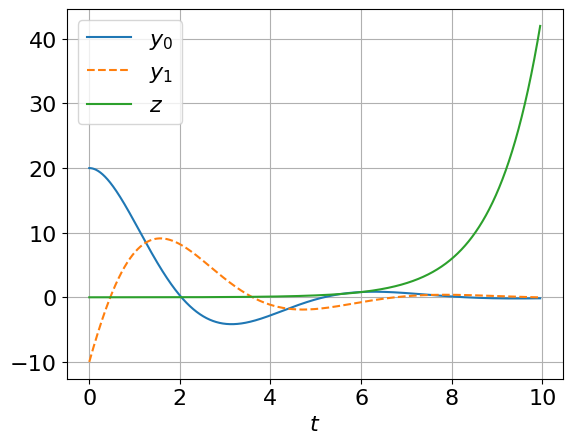

In [2]:
tinit = 0
tfinal = 9.95227772
trange = [tinit,tfinal]
yinit = [20,-10]

def dydt(t, y):
    y0 = y[0]
    y1 = y[1]
    dy0dt = -1/2 * y0 - y1
    dy1dt = y0 - 1/2 * y1
    return [dy0dt, dy1dt]

mysol = solve_ivp(dydt, trange, yinit, max_step=1e-3)
ts = mysol.t
y0s = mysol.y[0]
y1s = mysol.y[1]

import matplotlib.pyplot as plt
plt.rc('font', size=16)

fig, ax = plt.subplots()
ax.plot(ts,y0s, label='$y_0$')
ax.plot(ts,y1s, label='$y_1$', linestyle='dashed')
ax.plot(ts,1/(y0s**2 + y1s**2), label='$z$')
ax.set_xlabel('$t$')
ax.legend()
ax.grid()

(1/(y0s**2 + y1s**2))[-1]

# Opgave 2

Et objekt flyttes fra  $(0,y_0)$, til tiden  $t$=0  på en sådan måde at disse koblede differentialligninger hele tiden er opfyldt:

\begin{equation*}
\begin{array}{rcl}
\displaystyle\frac{dx}{dt}&=&\displaystyle\frac{v_p t -x}{\sqrt{(v_0 t - x)^2+y^2}}v_{obj},\\
&&\\
\displaystyle\frac{dy}{dt}&=&\displaystyle\frac{-y}{\sqrt{(v_0 t - x)^2+y^2}}v_{obj}.
\end{array}
\end{equation*}
Hvor $v_{obj}$ og $v_p$ er de konstante hastigheder af hhv objektet og af et punkt $r_p$. Sidstnævnte fremkommer som punktet, hvor tangenten til objektets bane skærer $x$-aksen.

Løs differentialligningerne og plot positionen af objektet. Benyt ækvidistante tider og observér at objektet bevæger sig lige langt ad vejen per tidsskridt.

Indsæt tangeterne.

Hint: tangenten til kurven går gennem $(x,y)$ og har hældningen,

\begin{equation*}
\displaystyle\frac{dy}{dx} = \displaystyle\frac{dy}{dt} / \displaystyle\frac{dx}{dt}
= \displaystyle\frac{-y}{v_p t -x}
\end{equation*}
Tegn kun den del af tangenterne, der går fra $(x,y)$ til skæringen med $x$-aksen. Tænk på
dem som liniestykker med bredde $\Delta x$ og højde $\Delta y$ (begge
regnet med fortegn). Det indses at alle de ønskede liniestykker har
$\Delta y = -y$, hvorved deres $\Delta x$ kan beregnes til:
\begin{equation*}
\begin{array}{rcl}
  \Delta y&=&\displaystyle\frac{dy}{dx}\Delta x\\
          &\Downarrow&\\
  -y&=&\displaystyle\frac{-y}{v_p t -x}\Delta x\\
          &\Downarrow&\\
\Delta x&=&v_p t -x
\end{array}
\end{equation*}

Tjek at tangenternes skæring med $x$-aksen fordeles ækvidistant.


![Image Title](https://python23.sci2u.dk/media/4/img/2025_toe1_opg2.png)


[1.0, 0.6392322713805368, 0.5237392455124329, 0.503346500248866, 0.5004555257861907]


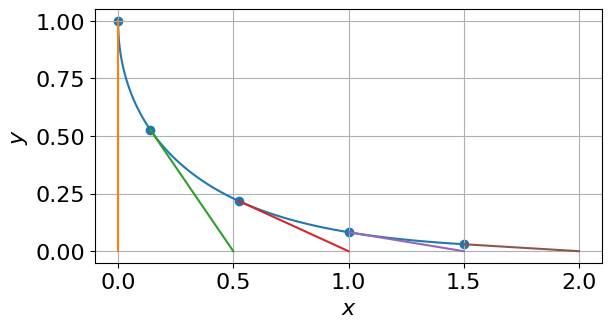

In [3]:
x0 = 0
y0 = 1
yinit = [x0 ,y0]

tinit = 0
tfinal = 20
trange = [tinit,tfinal]

v00 = 0.1
vobj = v00
vp = v00

def dydt(t, p):
    x = p[0]
    y = p[1]
    denominator = np.sqrt((vp * t - x)**2 + y**2)
    dxdt =  (vp * t - x) / denominator * vobj
    dydt = - y / denominator * vobj
    return [dxdt,dydt]
    
# løser for mange tider
ts_many = np.linspace(tinit,tfinal,101)
mysol = solve_ivp(dydt, trange, yinit, max_step=1e-2,
                  t_eval=ts_many)
ts1 = mysol.t
xs1 = mysol.y[0]
ys1 = mysol.y[1]

# løser for få tider
ts_few = np.linspace(tinit,tfinal,5)
mysol = solve_ivp(dydt, trange, yinit, max_step=1e-2,
                  t_eval=ts_few)
ts2 = mysol.t
xs2 = mysol.y[0]
ys2 = mysol.y[1]

import matplotlib.pyplot as plt
plt.rc('font', size=16)

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.grid()
ax.plot(xs1,ys1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xticks(list(np.arange(0,y0*2.7,y0*0.5)))

ax.scatter(xs2,ys2)
lengths = []
for t, x,y in zip(ts2, xs2,ys2):
    delta_x = vp * t -x
    delta_y = -y
    lengths.append(np.sqrt(delta_x**2 + delta_y**2))
    ax.plot([x,x+delta_x],[y,y+delta_y])
print(lengths)

fig.tight_layout()
fig.savefig('2025_toe1_opg2.png')

# Opgave 3

Nu skal samme opgave løses, hvor der regnes vektorielt. Derfor indføres:

$\mathbf{\hat{d}}$ er en enhedsvektor i retningen fra  $\mathbf{r}$ til $\mathbf{r}_p$, som vist på denne figur:

![Image Title](https://python23.sci2u.dk/media/2/img/ode_vector_box_schematic.png)

Punktet $\mathbf{r}_p$ ligger på $x$-aksen og bevæger sig med konstant hastighed. Man kan altså skrive:

\begin{equation*}
\mathbf{r}_p = \left[\begin{array}{c}v_p\>t\\0\end{array}\right],
\end{equation*}

indsætte det i:

\begin{equation*}
\mathbf{d} = \mathbf{r}_p - \mathbf{r},
\end{equation*}

og få enhedsvektoren med:

\begin{equation*}
\mathbf{\hat{d}} = \frac{\mathbf{d}}{\left|\mathbf{d}\right|}.
\end{equation*}



Gentag nu opgave 2 men med denne vektorielle differentialligning:
\begin{equation*}
\frac{d}{dt}\mathbf{r} = v_{obj}\>\mathbf{\hat{d}},
\end{equation*}
hvor $\mathbf{\hat{d}}$ er retningsvektoren indført ovenfor.

Du skal få samme figur som før.
![Image Title](https://python23.sci2u.dk/media/4/img/2025_toe1_opg3.png)


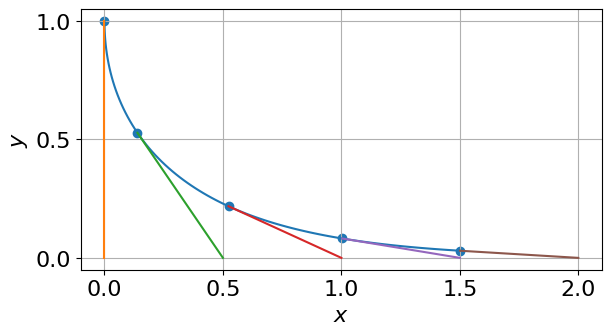

In [4]:
import numpy as np
from scipy.integrate import solve_ivp

x0 = 0
y0 = 1
yinit = [x0,y0]

tinit = 0
tfinal = 20
trange = [tinit,tfinal]

v0 = 0.1
vobj = v0
vp = v0

def dydt(t, p):               # undgår "y" for ikke at forveksle
    rk = np.array(p)
    rp = np.array([vp * t, 0])
    d = rp - rk
    dhat = d/np.linalg.norm(d)
    drkdt = vobj * dhat
    return drkdt
    
# løser for mange tider
ts_many = np.linspace(tinit,tfinal,101)
mysol = solve_ivp(dydt, trange, yinit, max_step=1e-2,
                  t_eval=ts_many)
ts1 = mysol.t
xs1 = mysol.y[0]
ys1 = mysol.y[1]

# løser for få tider
ts_few = np.linspace(tinit,tfinal,5)
mysol = solve_ivp(dydt, trange, yinit, max_step=1e-2,
                  t_eval=ts_few)
ts2 = mysol.t
xs2 = mysol.y[0]
ys2 = mysol.y[1]

import matplotlib.pyplot as plt
plt.rc('font', size=16)

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.grid()
ax.plot(xs1,ys1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xticks(list(np.arange(0,y0*2.7,y0*0.5)))
ax.set_yticks(list(np.arange(0,y0*1.2,y0*0.5)))

ax.scatter(xs2,ys2)
for t,x,y in zip(ts2,xs2,ys2):
    ax.plot([x,vp*t],[y,0])

fig.tight_layout()
fig.savefig('2025_toe1_opg3.png')

# Opgave 4

Et objekt flyttes stadigt fra $(0,y_0)$, til tiden  $t$=0, men nu ændres hastighedskomposanterne så i stedet disse koblede differentialligninger er opfyldt:

\begin{equation*}
\begin{array}{rcl}
\displaystyle\frac{dx}{dt}&=&\displaystyle\frac{y_0^2-y^2}{y_0^2}v_p,\\
&&\\
\displaystyle\frac{dy}{dt}&=&-\displaystyle\frac{y\sqrt{y_0^2-y^2}}{y_0^2}v_p.
\end{array}
\end{equation*}
Nu er $v_p$ den konstante hastighed af punktet på $x$-aksen, hvor
tangenten rammer. Benyt $v_p=0.1$.

Vigtigt hint: Da såvel $\displaystyle\frac{dx}{dt}$ som
$\displaystyle\frac{dy}{dt}$ giver nul for begyndelsesbetingelsen skal
man ændre denne en lille smule for at få integrationen med
`solve_ivp` til at begynde.
Benyt derfor $(0,2-10^{-6})$ som begyndelsesbetingelse.

Nu er de markerede positioner langs vejen ikke længere
ækvidistante. Det er punkterne som tangenterne rammer på $x$-aksen til
gengæld og alle tangent-liniestykker er nu lige lange:

![Image Title](https://python23.sci2u.dk/media/4/img/2025_toe1_opg4.png)

Vejen som objektet gennemløber kaldes en tractrix.

[1.0, 1.0, 1.0, 1.0, 0.9999999999999999]


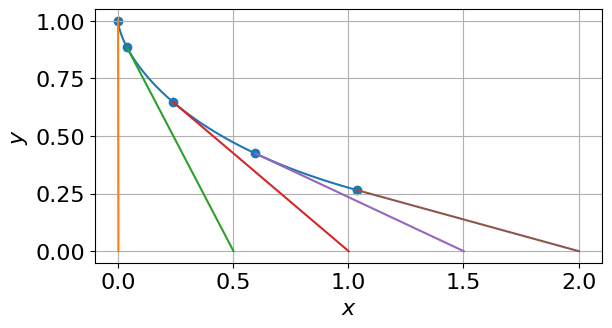

In [5]:
x0 = 0
y0 = 1
yinit = [x0,y0 - 1e-6] # må trække lidt fra y0 for at få dxdt != 0

tinit = 0
tfinal = 20
trange = [tinit,tfinal]

vp = 0.1

def dydt(t, p):
    x = p[0]
    y = p[1]
    dxdt = (y0**2-y**2)/y0**2 * vp
    dydt = - y * np.sqrt(y0**2-y**2)/y0**2 * vp
    return [dxdt,dydt]
    
# løser for mange tider
ts_many = np.linspace(tinit,tfinal,101)
mysol = solve_ivp(dydt, trange, yinit, max_step=1e-2,
                  t_eval=ts_many)
ts1 = mysol.t
xs1 = mysol.y[0]
ys1 = mysol.y[1]

# løser for få tider
ts_few = np.linspace(tinit,tfinal,5)
mysol = solve_ivp(dydt, trange, yinit, max_step=1e-2,
                  t_eval=ts_few)
ts2 = mysol.t
xs2 = mysol.y[0]
ys2 = mysol.y[1]

import matplotlib.pyplot as plt
plt.rc('font', size=16)

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.grid()
ax.plot(xs1,ys1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xticks(list(np.arange(0,y0*2.7,y0*0.5)))

ax.scatter(xs2,ys2)
lengths = []
for x,y in zip(xs2,ys2):
    delta_x = np.sqrt(y0**2-y**2)
    delta_y = -y
    lengths.append(np.sqrt(delta_x**2 + delta_y**2))
    ax.plot([x,x+delta_x],[y,y+delta_y])
print(lengths)

fig.tight_layout()
fig.savefig('2025_toe1_opg4.png')

# Opgave 5

Den sidste opgave kan også løses vektorielt. Da bliver differentialligningen:

\begin{equation*}
\frac{d}{dt}\mathbf{r} = \sqrt{1-\frac{y^2}{y_0^2}}v_p\>\mathbf{\hat{d}}
\end{equation*}

hvor $\mathbf{\hat{d}}$ har samme betydning som før. Implementér denne differentialligning og bestem løsningen.

![Image Title](https://python23.sci2u.dk/media/4/img/2025_toe1_opg5.png)

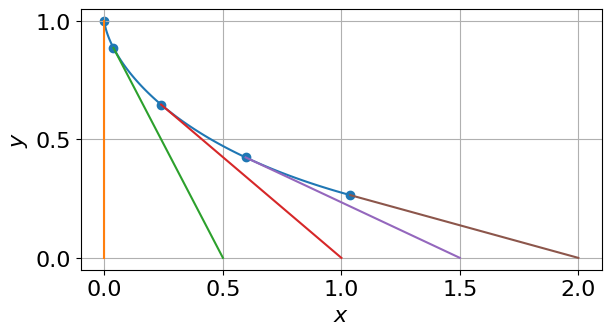

In [6]:
x0 = 0
y0 = 1
yinit = [x0,y0 - 1e-6]

tinit = 0
tfinal = 20
trange = [tinit,tfinal]

v0 = 0.1
vp = v0

def dydt(t, p):               # undgår "y" for ikke at forveksle
    rk = np.array(p)
    rp = np.array([vp * t, 0])
    d = rp - rk
    dhat = d/np.linalg.norm(d)
    y = rk[1]
    vobj = np.sqrt(1 - y**2/y0**2) * vp
    drkdt = vobj * dhat
    return drkdt
    
# løser for mange tider
ts_many = np.linspace(tinit,tfinal,101)
mysol = solve_ivp(dydt, trange, yinit, max_step=1e-2,
                  t_eval=ts_many)
ts1 = mysol.t
xs1 = mysol.y[0]
ys1 = mysol.y[1]


# løser for få tider
ts_few = np.linspace(tinit,tfinal,5)
mysol = solve_ivp(dydt, trange, yinit, max_step=1e-2,
                  t_eval=ts_few)
ts2 = mysol.t
xs2 = mysol.y[0]
ys2 = mysol.y[1]

import matplotlib.pyplot as plt
plt.rc('font', size=16)

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.grid()
ax.plot(xs1,ys1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xticks(list(np.arange(0,y0*2.7,y0*0.5)))
ax.set_yticks(list(np.arange(0,y0*1.2,y0*0.5)))

ax.scatter(xs2,ys2)
for t,x,y in zip(ts2,xs2,ys2):
    ax.plot([x,vp*t],[y,0])

fig.tight_layout()
fig.savefig('2025_toe1_opg5.png')

# Opgave 6

Animér løsningen til differentialligningen

Tænk evt på at det er en kasse i $\mathbf{r}$ som trækkes i en stram snor af en person i $\mathbf{r}_h$.

<img src="https://mldft.com/media/1/img/TO-F_fig2.gif" alt="Description of your image" style="width:80%">